# Importing the Libraries

In [1]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.svm import SVR # for building the model

# Reading the Dataset

In [2]:
df = pd.read_csv('Activity Stress Prediction Data.csv', encoding='utf-8')

In [3]:
df

,CallDuration,PhotoCount,DrivingDuration,SleepDuration,MusicDuration,ExerciseDuration,SNSUsage,IdleTime,PhysicalScore,MentalScore
0,37,0,27,75,28,1,16,56,7,8
1,30,7,52,68,30,26,15,12,8,9
2,3,8,31,70,12,8,21,87,9,9
3,3,6,55,64,29,12,22,49,8,9
4,27,4,52,68,24,6,19,40,7,8
...,...,...,...,...,...,...,...,...,...,...
85,7,9,29,75,14,15,23,68,8,7
86,50,8,59,74,20,24,18,17,7,9
87,28,5,41,76,26,5,17,42,6,8
88,21,9,2,66,30,29,28,55,9,10


In [4]:
x = df.iloc[:,:8] 
y = df.iloc[:, [8,9]]

In [5]:
x

,CallDuration,PhotoCount,DrivingDuration,SleepDuration,MusicDuration,ExerciseDuration,SNSUsage,IdleTime
0,37,0,27,75,28,1,16,56
1,30,7,52,68,30,26,15,12
2,3,8,31,70,12,8,21,87
3,3,6,55,64,29,12,22,49
4,27,4,52,68,24,6,19,40
...,...,...,...,...,...,...,...,...
85,7,9,29,75,14,15,23,68
86,50,8,59,74,20,24,18,17
87,28,5,41,76,26,5,17,42
88,21,9,2,66,30,29,28,55


In [6]:
y

,PhysicalScore,MentalScore
0,7,8
1,8,9
2,9,9
3,8,9
4,7,8
...,...,...
85,8,7
86,7,9
87,6,8
88,9,10


## Train-Test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)

In [8]:
x_train

,CallDuration,PhotoCount,DrivingDuration,SleepDuration,MusicDuration,ExerciseDuration,SNSUsage,IdleTime
21,27,2,57,60,24,8,12,50
75,18,9,9,70,31,24,11,68
88,21,9,2,66,30,29,28,55
38,5,7,57,76,15,3,23,54
29,55,3,45,69,12,2,29,25
...,...,...,...,...,...,...,...,...
55,30,9,4,89,47,24,32,5
81,44,7,57,72,14,14,27,5
80,34,7,38,75,12,6,25,43
63,56,4,19,82,44,13,18,4


In [9]:
y_train

,PhysicalScore,MentalScore
21,6,8
75,7,9
88,9,10
38,8,8
29,5,7
...,...,...
55,9,10
81,6,8
80,7,9
63,8,6


In [10]:
x_test

,CallDuration,PhotoCount,DrivingDuration,SleepDuration,MusicDuration,ExerciseDuration,SNSUsage,IdleTime
46,16,3,38,74,22,9,15,63
60,37,2,13,90,56,0,13,29
20,35,8,45,65,27,7,13,40
72,59,4,3,109,26,14,10,15
36,3,2,37,64,16,4,27,87
50,34,9,19,91,24,5,31,27
51,44,9,28,85,28,13,34,19
16,28,3,0,77,11,11,20,90
82,38,5,34,72,25,23,15,28
86,50,8,59,74,20,24,18,17


In [11]:
y_test

,PhysicalScore,MentalScore
46,6,9
60,7,8
20,9,8
72,9,8
36,8,8
50,7,10
51,6,9
16,9,8
82,7,8
86,7,9


## Initializing the SVR model

In [12]:
# Initializing the SVR model with 10 decision trees
model = SVR(kernel = 'rbf',epsilon=0.2)
# Fitting the SVR model to the data
from sklearn.multioutput import MultiOutputRegressor

In [13]:
finalModel = MultiOutputRegressor(model)

In [14]:
finalModel = finalModel.fit(x_train, y_train)

In [15]:
y_pred = finalModel.predict(x_test)

In [16]:
y_pred

array([[7.88239321, 8.40971819],
       [7.26770317, 7.41202328],
       [7.27853892, 8.53787508],
       [7.49971413, 7.80380985],
       [7.87683863, 7.92213862],
       [7.0095518 , 8.61579554],
       [7.00119699, 8.3150601 ],
       [8.00059454, 8.37660197],
       [7.76471985, 8.65134736],
       [7.01840528, 8.76063583],
       [6.66531224, 7.93844564],
       [7.43297089, 7.72085652],
       [7.98874149, 8.30925759],
       [6.91310856, 8.28466469],
       [7.19424554, 8.07459812],
       [7.78052984, 8.18919513],
       [7.97711316, 8.05857934],
       [7.61389601, 8.23125399]])

## Predicted Output

In [17]:
predictedOutput = []
for i in y_pred:
  predictedOutput.append((i[0] + i[1])/2)

In [18]:
predictedOutput

[8.146055697916992,
 7.339863225174263,
 7.908206995980946,
 7.651761990845815,
 7.899488628186108,
 7.812673669091048,
 7.658128547387946,
 8.188598253985734,
 8.208033601096936,
 7.889520553727555,
 7.30187893839552,
 7.5769137004923515,
 8.148999539334143,
 7.598886623865374,
 7.634421829274811,
 7.984862483110774,
 8.017846250559833,
 7.922574997953694]

In [19]:
predictedOutput = []
for i in y_pred:
  a = (i[0] + i[1])/2
  if a < 3:
    predictedOutput.append(0)
  elif a>=3 and a<6.5:
    predictedOutput.append(1)
  else:
    predictedOutput.append(2)

In [20]:
predictedOutput

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

## Actual Output

In [21]:
actualOutput = []
y=np.array(y_test)
for i in y:
  a = (i[0] + i[1])/2
  if a < 3:
    actualOutput.append(0)
  elif a>=3 and a<6.5:
    actualOutput.append(1)
  else:
    actualOutput.append(2)

In [22]:
actualOutput

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]

In [23]:
actualOutput = np.array(actualOutput)

In [24]:
predictedOutput = np.array(predictedOutput)

# PERFORMANCE EVALUATION

### F1-Score

In [25]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(actualOutput, predictedOutput).ravel()

In [26]:
precision = tp/(tp+tn)

In [27]:
precision

1.0

In [28]:
recall = tp/(tp+fn)

In [29]:
recall

1.0

In [30]:
f1 = 2*precision*recall/(precision+recall)
print(f1)

1.0


### Root Mean Squared Error 

In [31]:
rmse = float(format(np.sqrt(mean_squared_error(actualOutput, predictedOutput)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.236


In [32]:
from math import sqrt
root_mean_squared_error = sqrt(mean_squared_error(actualOutput, predictedOutput))

In [33]:
root_mean_squared_error

0.23570226039551584

### Mean Squared Error 

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(actualOutput, predictedOutput)

0.05555555555555555

### Mean Absolute Error 

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(actualOutput, predictedOutput)

0.05555555555555555

# Exploratory Data Analysis

### Bar graph showing the difference between Actual and predicted value

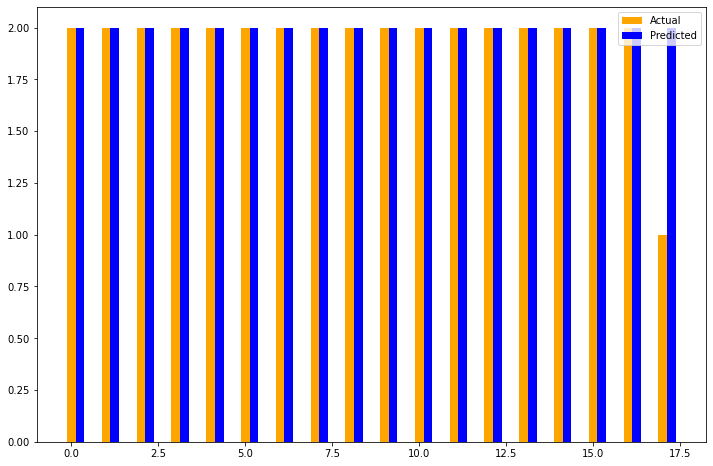

In [36]:
fig = plt.subplots(figsize=(12,8))
br1 = np.arange(len(actualOutput))
br2 = [x + 0.25 for x in br1]
plt.bar(br1, actualOutput, color='orange', width=0.25)
plt.bar(br2, predictedOutput, color='Blue', width = 0.25)
plt.legend(["Actual", "Predicted"])
plt.show()

### Box Plot

<AxesSubplot:>

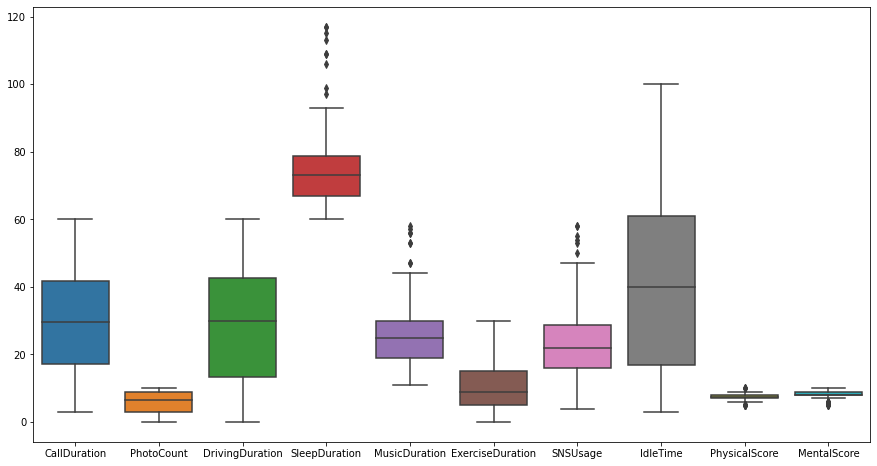

In [37]:
import seaborn as sb
fig = plt.subplots(figsize=(15,8))
sb.boxplot(data=df)

### Correlation Matrix

In [38]:
df.corr()

,CallDuration,PhotoCount,DrivingDuration,SleepDuration,MusicDuration,ExerciseDuration,SNSUsage,IdleTime,PhysicalScore,MentalScore
CallDuration,1.000000,-0.035973,-0.047401,0.209639,0.106497,0.057346,-0.031508,-0.610345,-0.124146,-0.068179
PhotoCount,-0.035973,1.000000,-0.071026,0.184220,-0.095810,0.140621,0.101446,-0.116035,-0.033633,0.441833
DrivingDuration,-0.047401,-0.071026,1.000000,-0.470560,-0.363203,-0.300057,-0.269247,-0.058207,-0.155244,0.230900
SleepDuration,0.209639,0.184220,-0.470560,1.000000,0.437902,0.113585,0.275434,-0.489342,0.052816,0.078945
MusicDuration,0.106497,-0.095810,-0.363203,0.437902,1.000000,0.153310,0.292872,-0.502717,0.036901,-0.311568
ExerciseDuration,0.057346,0.140621,-0.300057,0.113585,0.153310,1.000000,0.117819,-0.213951,0.360875,0.049188
SNSUsage,-0.031508,0.101446,-0.269247,0.275434,0.292872,0.117819,1.000000,-0.368532,-0.080901,-0.135398
IdleTime,-0.610345,-0.116035,-0.058207,-0.489342,-0.502717,-0.213951,-0.368532,1.000000,0.083286,-0.001718
PhysicalScore,-0.124146,-0.033633,-0.155244,0.052816,0.036901,0.360875,-0.080901,0.083286,1.000000,0.072716
MentalScore,-0.068179,0.441833,0.230900,0.078945,-0.311568,0.049188,-0.135398,-0.001718,0.072716,1.000000


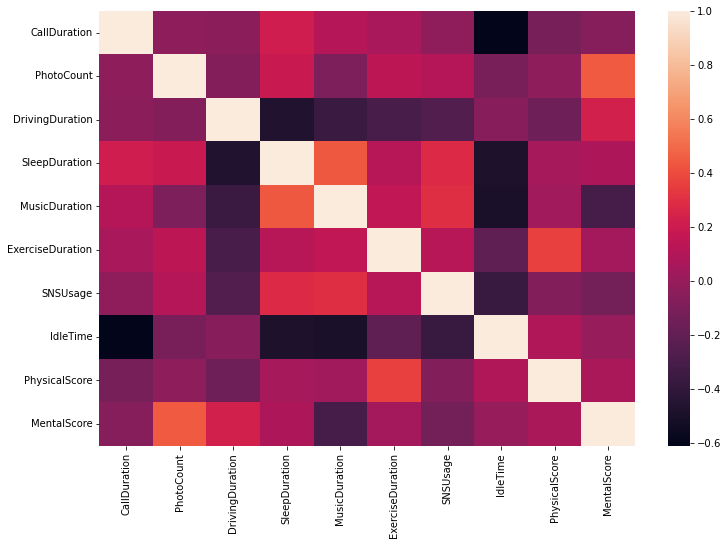

In [39]:
fig = plt.subplots(figsize=(12,8))
sb.heatmap(df.corr())
plt.show()